In [72]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize
import math
from scipy import ndimage

smart content aware noise removal could be one idea to improve.
working fine all images.
gaussianblur inbuilt works only on even window sizes

In [3]:
def find_scan_screenshot(img):
    # return 0 for scan/screenshot and 1 for photograph
    total_pixels = img.shape[0]*img.shape[1]
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    prop = np.sum(hist[15:241])/total_pixels
    if prop<0.1:
        return 0
    else:
        return 1

In [4]:
def binarization_scans(img):
    # using inbuilt otsu's method..Implement later
    _,im = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return im
#handle very small images later 
def binarization_photos(img):
    high_res = 0
    if img.size>2000*1000:
        high_res = 1
    
    if high_res==1:
        img = cv2.GaussianBlur(img,(9,9),3) # fails for even
    
    window_size = int(min(img.shape[0],img.shape[1])/60)
    if window_size%2==0:
        window_size+=1 #cv2.adaptiveThreshold accepts only odd window sizes
    
    thresh_img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,window_size,10)
    return thresh_img
def morph_proc(img):
    img = 255 - img
    img[img==255] = 1
    kernel = np.ones((3,3))
    kernel1 = np.ones((5,5))
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) 
    closed = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) 
    filled = cv2.morphologyEx(closed, cv2.MORPH_DILATE, kernel1) 
    filled[filled==1] = 255
    return 255-filled

In [5]:
def binarize_input(img):
    img_type = find_scan_screenshot(img)
    if img_type==0:
        print("Scan/Screenshot")
    else:
        print("Photograph")
    if img_type==0:
        new_img = binarization_scans(img)
    else:
        new_img = binarization_photos(img)
        new_img = morph_proc(new_img)
    return new_img

2019-10-25_22-02.png


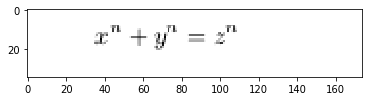

Scan/Screenshot


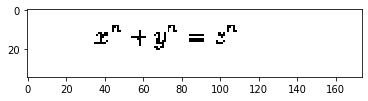

test.jpg.png


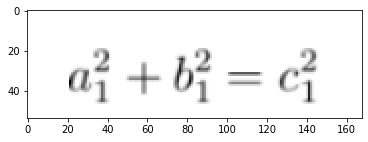

Photograph
eq3_hr.jpg


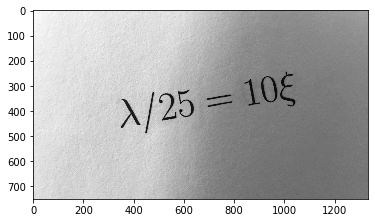

Photograph


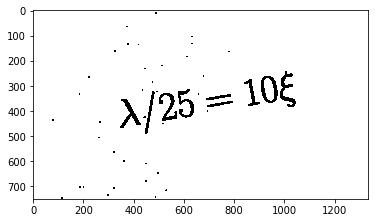

2019-10-25_22-04_2.png


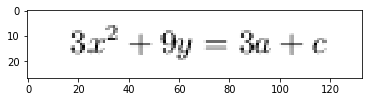

Scan/Screenshot


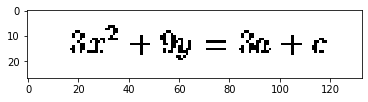

demo_equation_hr.jpg


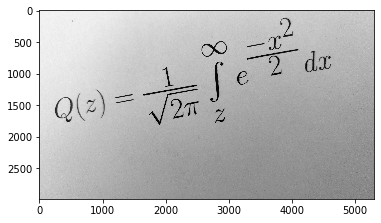

Photograph


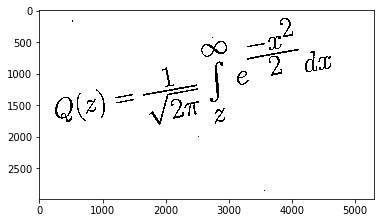

2019-10-25_22-02_1.png


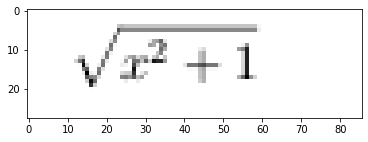

Scan/Screenshot


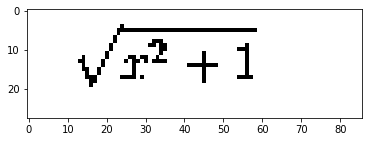

eq8_hr.jpg


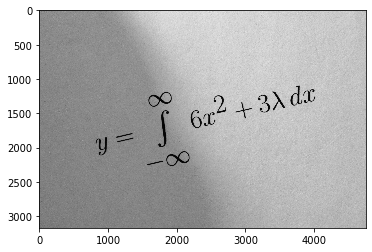

Photograph


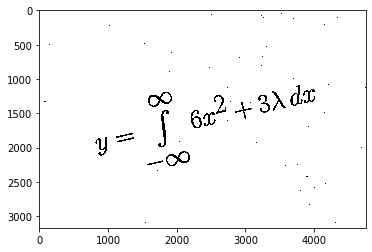

eq5_hr.jpg


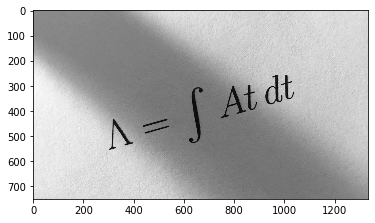

Photograph


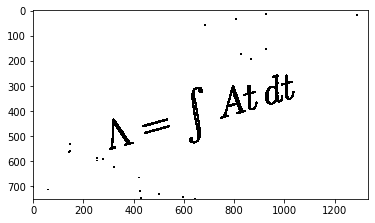

eq1_hr.jpg


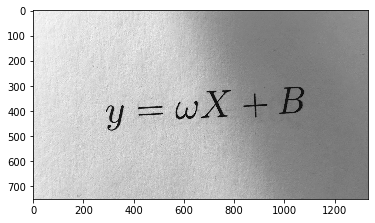

Photograph


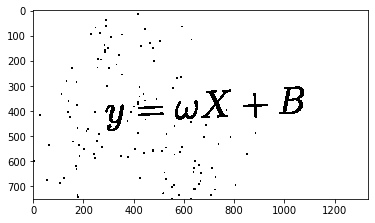

2019-10-25_22-04_1.png


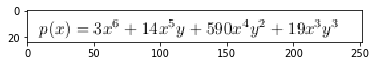

Photograph
2019-10-25_22-04.png


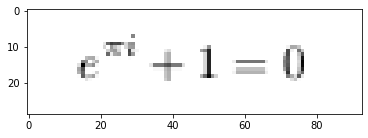

Scan/Screenshot


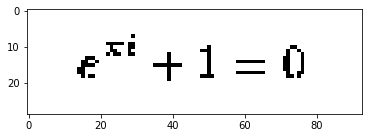

eq2_hr.jpg


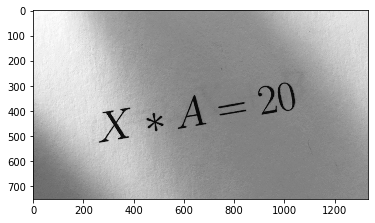

Photograph


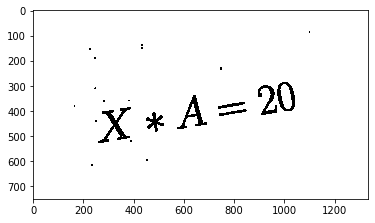

eq6_hr.jpg


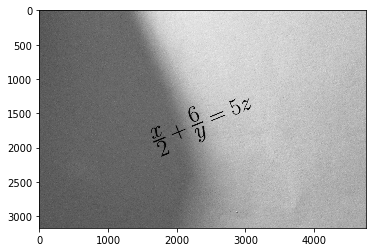

Photograph


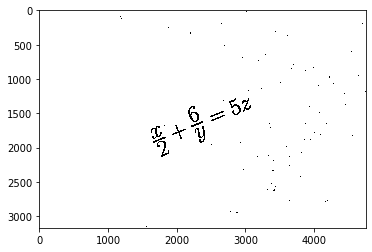

eq7_hr.jpg


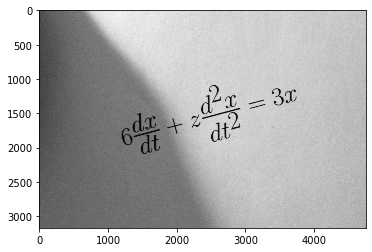

Photograph


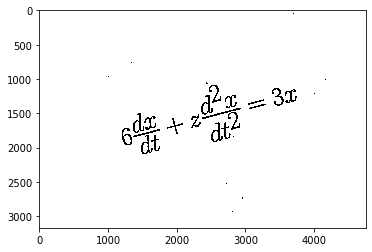

eq9_hr.jpg


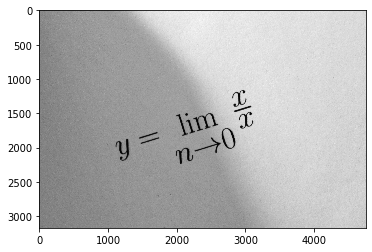

Photograph


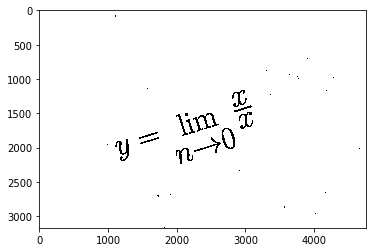

In [6]:
directory = "../input/"
for filename in os.listdir("../input/"):
    try:
        img_name = os.path.join(directory, filename)
        print(filename)
        img = cv2.imread(img_name,0)
        plt.imshow(img,cmap='gray')
        plt.show()
        new_img = binarize_input(img)
        plt.imshow(new_img,cmap='gray')
        plt.show()
    except :
        pass

Photograph


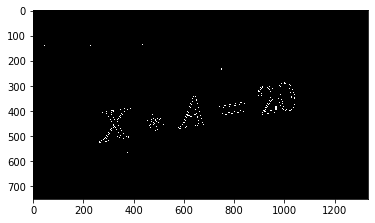

1
Angle is -9.554289672401765


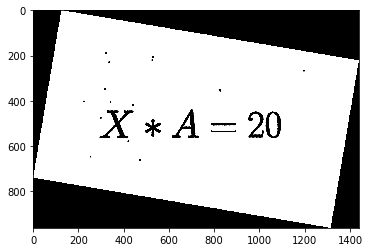

In [86]:
img = cv2.imread("../input/eq2_hr.jpg",0)
new_img = binarize_input(img)
img_edges = cv2.Canny(img, 100, 100, apertureSize=3)
plt.imshow(img_edges,cmap='gray')
plt.show()

lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

for x1, y1, x2, y2 in lines[0]:
    cv2.line(new_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)
print(len(angles))
median_angle = np.mean(angles[:4])
img_rotated = ndimage.rotate(new_img,median_angle)

print ("Angle is {}".format(median_angle))
plt.imshow(img_rotated,cmap="gray")